In [135]:
import util_midi
from util_midi import *
import librosa
import librosa.display
def cqt(p):
    sr = p.bitrate
    y  = p.xs
    chroma_cq = librosa.feature.chroma_cqt(y=y, sr=sr, 
#                                            window = 50,
#                                           hop_length = 1
                                          )
    librosa.display.specshow(chroma_cq, y_axis='chroma', x_axis='time')
    plt.show()
    return chroma_cq.T
def stft(p):
    sr = p.bitrate
    y  = p.xs
    chroma_cq = librosa.feature.chroma_stft(y=y, sr=sr,
                                           n_chroma=12, n_fft=800,
                                           hop_length=800)
    librosa.display.specshow(chroma_cq, y_axis='chroma', x_axis='time')
    plt.show()
    return chroma_cq.T

def mroll2chroma(mroll,norm = 1):
#     if chroma:
    if mroll.shape[-1]==12:
        return mroll
    mroll = mroll[:,:120]
    SP = list(mroll.shape)
#         SP[1] = 12; SP.append(-1)
#         mroll = np.reshape(mroll,SP).sum(axis = 2)
    SP[1] = -1; SP.append(12)
#     cmroll = np.clip(cmroll,0,1)
    #     cmroll = 
    if norm:
        wt = (np.linspace(0,1,120)).T
        sqwt = wt**2
        sq_mroll = mroll **2
        SUM = (sq_mroll*sqwt).sum(axis = 1,keepdims = 1)
        SUM[SUM==0]=1
        mroll = mroll/SUM.astype('float32')

#         SUM = cmroll.sum(axis = 1,keepdims =1 )
#         SUM[SUM==0]=1
#         cmroll = cmroll / SUM.astype(float)
    cmroll = np.reshape(mroll,SP).sum(axis = 1)
#         cmroll = np.clip(cmroll,0,1)
    return cmroll 
#     print mroll.shape

def midi_roll_play(mroll,chroma = False, sample_dt = 0.05):
    if mroll.shape[-1]==12:
        freqs = mir_eval.transcription.util.midi_to_hz(np.arange(60,72))
    else:
        freqs = mir_eval.transcription.util.midi_to_hz(np.arange(0,128))
#     mroll = np.log(mroll+1E-5)
    SHAPE = mroll.shape
    mroll = mroll.T * freqs.T[:,None]
#     mroll = norm_by_freq(mroll)
    Xs_exp = mir_eval.sonify.time_frequency( mroll ,freqs,times = sample_dt*np.arange(SHAPE[0]),fs = 16000)
#     Xs_exp = np.hstack([Xs_exp,[0]*(len(cpXs)-len(Xs_exp))])
    return Xs_exp/np.sqrt((Xs_exp**2).mean())


[WARN]:No notes were detected in <meta message time_signature numerator=3 denominator=4 clocks_per_click=24 notated_32nd_notes_per_beat=8 time=0>
2926
(2925, 128) (2925, 400)


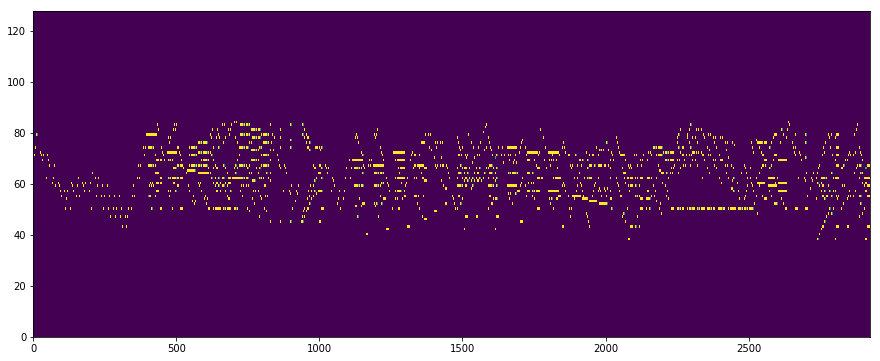

In [146]:
# filename = 'sample/MIDI/jsbach/bwv0541f.mid'

import sys
reload(sys.modules['util_midi'])
import util_midi
SDT = 0.025

filename = 'sample/MIDI/composer-bach-edition-bg-genre-cant-work-0002-format-midi1-multi-zip-number-04.mid'
bname = filename.rstrip('.mid')
filename = 'sample/MIDI/jsbach/bwv0541f.single_mid'
# filename = 'sample/MIDI/midiworld/968.single_mid'
# filename = 'sample/MIDI/midiworld/646.single_mid'
# filename ='sample/MIDI/midiworld/473.single_mid'
filename = 'sample/MIDI/midiworld/187.single_mid'
filename = 'sample/MIDI/jsbach/bwv630sc.single_mid'
filename = 'sample/MIDI/jsbach/bwv0541pP0S0.single_mid'
bname = filename.rstrip('.single_mid')

if 1:
    mid = mido.MidiFile(filename)
    mid.TEMPO = get_tempo(mid)

mroll_ext  = util_midi.extract_midi_roll('%s.single_mid'%bname,sample_dt=SDT,THRESHOLD = 0.5)
# print mroll_ext.shape

import util
p = util.piece('%s.wav'%bname)
if p.x0.dtype =='int16':
    p.x0 = p.x0.astype('float32')/2**15
chunks  = p.to_chunk(int(1/SDT)) 
print mroll_ext.shape,chunks.shape
chunks  = chunks[:len(mroll_ext)]
mroll_ext = mroll_ext[:len(chunks)]
plt.show()
# print p.x0.shape

In [ ]:
# print bname

In [81]:
print Xs.shape,Ys.shape

(51, 800) (51, 128)


(2923, 400) (2923, 128)
1.488
(2925, 400) (2925, 128)
(25600,) (25600,)


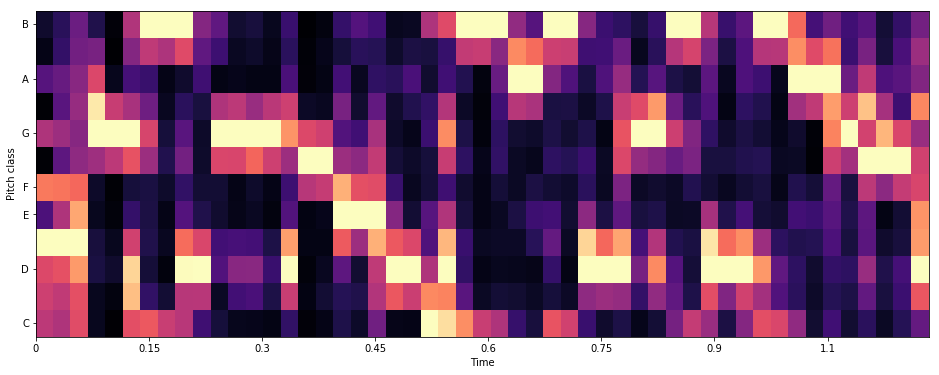

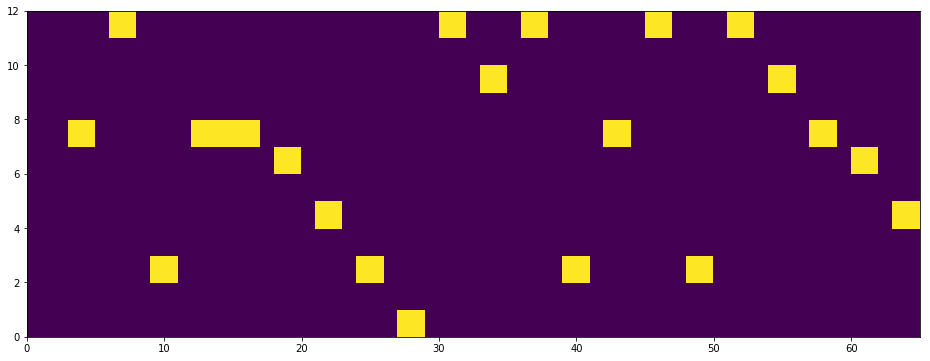

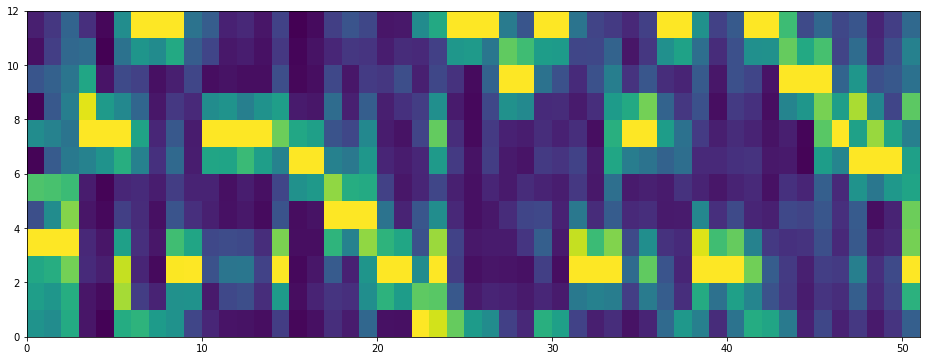

In [148]:
import IPython.display as ipd

# from util_midi import *
# import mir_eval,util_midi
# Xs,Ys = np.load('%s.both.npy'%bname)
# Xs = np.squeeze(Xs)
print Xs.shape,Ys.shape
Xs = chunks.copy()
Ys = mroll_ext.copy()

offset = (0.93 * 0.04 * 1/SDT)
print offset
offset= int(offset)
offset = 0
if offset > 0 :
    Xs = Xs[offset:]
    Ys = Ys[:-offset]
if offset < 0 :
    Ys = Ys[-offset:]
    Xs = Xs[:offset]

truncate = 1.6
truncate = int(truncate / SDT)
print Xs.shape,Ys.shape

if truncate > 0:
    Xs = Xs[:truncate + 1]
    Ys = Ys[:truncate + 1]
elif truncate < 0:
    Xs = Xs[truncate:]
    Ys = Ys[truncate:]
    
# Ys = util_midi.mroll2chroma(Ys)

cXs = np.concatenate(Xs[:-1],axis = 0)
cYs = midi_roll_play(Ys, sample_dt = SDT)
print cXs.shape,cYs.shape
sr = 4000
ipd.display(ipd.Audio(2*cYs,rate = sr))
ipd.display(ipd.Audio(cXs,rate = sr))
ipd.display(ipd.Audio(cYs+40*cXs,rate = sr))
# ipd.display(ipd.Audio(cXs,rate = 8000))

plt.figure(figsize = [16,6])
p.xs = cXs
# q1 = stft(p)
q1 = cqt(p)


plt.figure(figsize = [16,6])
p.xs = cYs[offset:]
# q2 = cqt(p)
ccYs = mroll2chroma(Ys,norm = 0) > 0
# ccYs = Ys> 0
# print N
q2 = ccYs 
plt.pcolormesh(q2.T,)
plt.show()

plt.figure(figsize = [16,6])
plt.pcolormesh( (q1).T,)
plt.show()


In [ ]:
Xs0 = chunks.copy()
Ys0 = mroll_ext.copy()


In [151]:
import util_nn
DIRs = [
#     'sample/MIDI/',
#         'sample/MIDI/midiworld/',
        'sample/MIDI/jsbach/'
       ]
DATA = []
for DIR in DIRs:
    data = util_nn.load_data(DIR)
    Xs,Ys= util_nn.make_buffer(data[1:],truncate = 0)
#     Ys = mroll2chroma(Ys,norm = 0)
    DATA.append([Xs,Ys])
import itertools
cDATA = [np.concatenate(lst,axis = 0) for lst in itertools.izip(*DATA)]    
Xs0,Ys0 = cDATA

In [152]:
import matplotlib as mpl

lst = '''
sqYs = (Ys*1).sum(axis = 1)
sqYs = (Ys**0.5*1).sum(axis = 1)
sqYs = (Ys**2).sum(axis = 1)
sqYs = (Ys*wt).sum(axis = 1)
sqYs = (Ys*wt**2).sum(axis = 1)
sqYs = (Ys*np.exp(wt)).sum(axis = 1)
sqYs = (Ys*np.exp(2*wt)).sum(axis = 1)
sqYs = (Ys**2*wt).sum(axis = 1)
sqYs = (Ys**2*wt**2).sum(axis = 1)
'''.split('\n')[1:-1]
for offset in range(-3,3):
    Xs = Xs0.copy()
    Ys = Ys0.copy()
    sdXs = (Xs**2).sum(axis = 1,keepdims = 0)**0.5
    wt = (np.linspace(0,1,128)).T

    print offset
    if offset > 0 :
        Xs = Xs[offset:]
        Ys = Ys[:-offset]
    if offset < 0 :
        Ys = Ys[-offset:]
        Xs = Xs[:offset]
        
    for code in lst[4:]:
        print code
        exec code
        X = sdXs; Y = sqYs
        idx = min(len(X),len(Y))
        X = X[:idx]; Y = Y[:idx]
        print np.corrcoef(X,Y)[0,1]
        break
        fig = plt.figure()
        ax2 = plt.subplot(122)
        BINS = 30
        ax2.hist2d(X[:idx],Y[:idx]
                   ,bins=BINS
                   ,norm = mpl.colors.LogNorm())
        plt.show()
        break
#     break

-3
sqYs = (Ys*wt**2).sum(axis = 1)
0.456362494766
-2
sqYs = (Ys*wt**2).sum(axis = 1)
0.460625641686
-1
sqYs = (Ys*wt**2).sum(axis = 1)
0.490041800886
0
sqYs = (Ys*wt**2).sum(axis = 1)
0.540619040329
1
sqYs = (Ys*wt**2).sum(axis = 1)
0.54066762687
2
sqYs = (Ys*wt**2).sum(axis = 1)
0.54069338207


In [79]:
for t in mid.tracks:
    for i in range(min(7,len(t))):
        print t[i]
#     print t[0]
#     print t[1]

<meta message time_signature numerator=3 denominator=4 clocks_per_click=24 notated_32nd_notes_per_beat=8 time=0>
<meta message set_tempo tempo=600000 time=0>
<meta message smpte_offset frame_rate=25 hours=0 minutes=0 seconds=0 frames=1 sub_frames=0 time=0>
<meta message end_of_track time=0>
<meta message track_name name=u'Prelude in G-Major - BWV 541' time=0>
program_change channel=0 program=62 time=0
note_on channel=0 note=67 velocity=64 time=60
note_off channel=0 note=67 velocity=64 time=48
note_on channel=0 note=71 velocity=64 time=12
note_off channel=0 note=71 velocity=64 time=48
note_on channel=0 note=74 velocity=64 time=12
<meta message track_name name=u'J.S.Bach/Arr. G. Bricault' time=0>
program_change channel=0 program=63 time=0
note_on channel=0 note=55 velocity=64 time=1680
note_off channel=0 note=55 velocity=64 time=48
note_on channel=0 note=62 velocity=64 time=12
note_off channel=0 note=62 velocity=64 time=48
note_on channel=0 note=60 velocity=64 time=12
<meta message track

In [69]:
ratio  = mido.second2tick(1,tempo=get_tempo(mid),ticks_per_beat=mid.ticks_per_beat)
13*SDT*ratio


54.600016380004924

In [12]:
??plot_midi_roll

In [59]:
t0 = 0.93 * 0.04 
print t0, t0* 16000
# 0.25

0.0372 595.2


<meta message time_signature numerator=4 denominator=4 clocks_per_click=24 notated_32nd_notes_per_beat=8 time=0>
<meta message set_tempo tempo=1428571 time=0>
<meta message smpte_offset frame_rate=25 hours=0 minutes=0 seconds=0 frames=0 sub_frames=93 time=0>
<meta message end_of_track time=0>
0.372
[WARN]:No notes were detected in <meta message time_signature numerator=4 denominator=4 clocks_per_click=24 notated_32nd_notes_per_beat=8 time=0>
<meta message track_name name=u'(C) & (P) 1993' time=0>
<meta message end_of_track time=127>
[WARN]:No notes were detected in <meta message track_name name=u'(C) & (P) 1993' time=0>
<meta message track_name name=u'CCARH,Stanford' time=0>
<meta message end_of_track time=0>
[WARN]:No notes were detected in <meta message track_name name=u'CCARH,Stanford' time=0>
<meta message track_name name=u'Violino I' time=0>
program_change channel=0 program=41 time=0
note_on channel=0 note=67 velocity=88 time=0
note_off channel=0 note=67 velocity=0 time=945
note_o

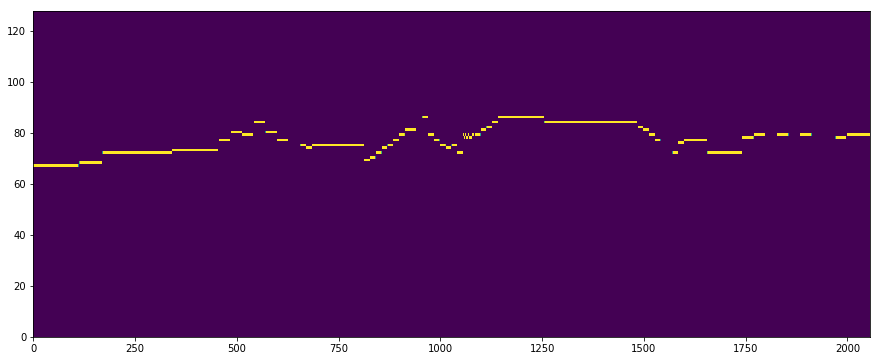

<meta message track_name name=u'Violino II' time=0>
program_change channel=1 program=41 time=0
note_on channel=1 note=63 velocity=88 time=0
note_off channel=1 note=63 velocity=0 time=945
note_on channel=1 note=65 velocity=88 time=15


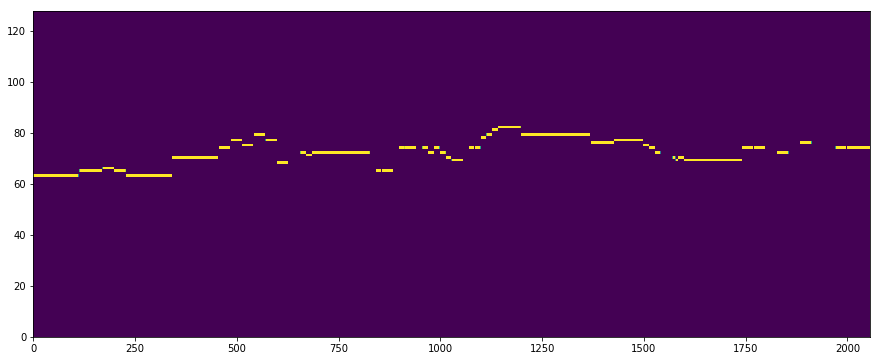

<meta message track_name name=u'Viola' time=0>
program_change channel=2 program=41 time=0
note_on channel=2 note=58 velocity=88 time=0
note_off channel=2 note=58 velocity=0 time=945
note_on channel=2 note=62 velocity=88 time=15


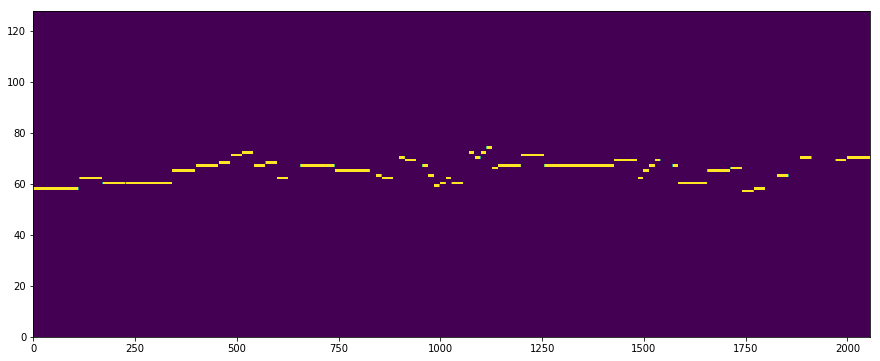

<meta message track_name name=u'BASSO' time=0>
program_change channel=3 program=52 time=0
note_on channel=3 note=51 velocity=88 time=360
note_off channel=3 note=51 velocity=0 time=116
note_on channel=3 note=61 velocity=88 time=4


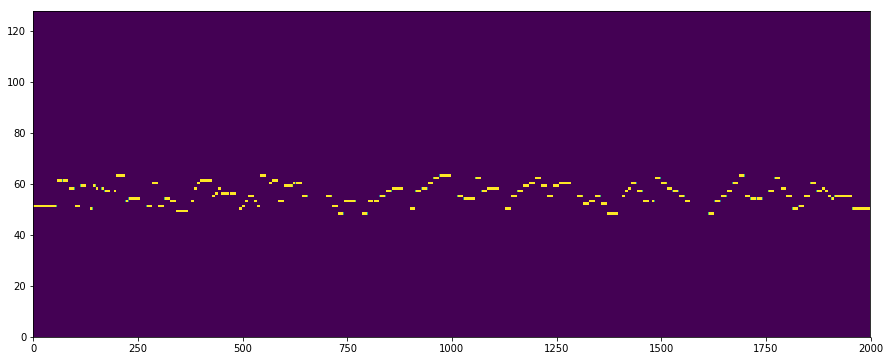

<meta message track_name name=u'Continuo' time=0>
program_change channel=4 program=42 time=0
note_on channel=4 note=51 velocity=88 time=0
note_off channel=4 note=51 velocity=0 time=1905
note_on channel=4 note=45 velocity=88 time=15


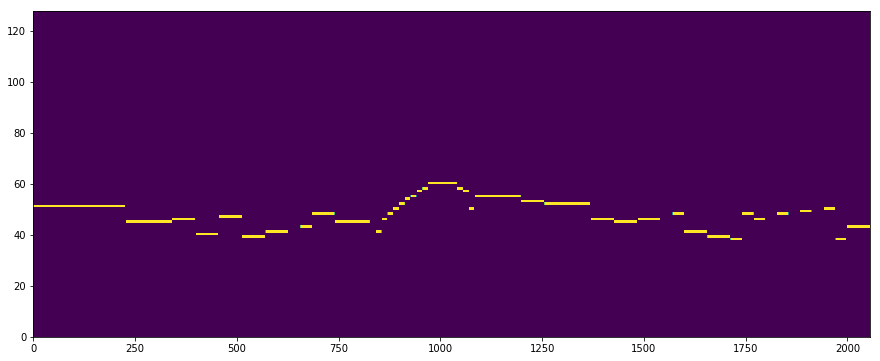

<meta message track_name name=u'Continuo (Organ)' time=0>
program_change channel=5 program=16 time=0
note_on channel=5 note=51 velocity=88 time=0
note_off channel=5 note=51 velocity=0 time=1905
note_on channel=5 note=45 velocity=88 time=15


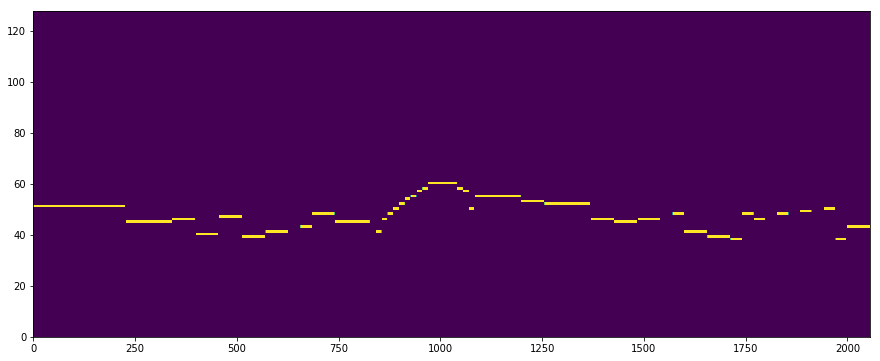

In [103]:
# from util_midi import *
# filename = 'sample/MIDI/jsbach/bwv0541f.mid'
filename = 'sample/MIDI/composer-bach-edition-bg-genre-cant-work-0002-format-midi1-multi-zip-number-04.mid'
# filename = 'sample/MIDI/jsbach/bwv630sc.single_mid'
bname = filename.rstrip('.mid')
sample_dt = 0.05
DEBUG = 1


def smpte2second(msg):
    fps = msg.frame_rate
#     fpsInSec = 1./fps
    InSec = msg.hours * 3600 + msg.minutes * 60 + msg.seconds + (msg.frames + msg.sub_frames / 10.) / fps
    return InSec
if 1:
    mid = mido.MidiFile(filename)
    mid.TEMPO = get_tempo(mid)
    lst = []
    try:
        for track in mid.tracks:
            print '\n'.join(str(x) for x  in track[:5])
            for msg in track:
                if msg.type=='smpte_offset':
#                     print msg
                    print smpte2second(msg)
                    break
            mroll = track2midi(track, sample_dt = sample_dt, TEMPO=mid.TEMPO,ticks_per_beat= mid.ticks_per_beat,DEBUG = 1)
            if mroll is not None:
                plot_midi_roll(mroll)
                plt.show()
                lst.append(mroll)
    except Exception as e:
        print e
